## First analysis of constructed metrics

This notebook is created to get a first insight in the metrics, their distribution, and their dependence on each other.

We start by finding and deleting empty (NaN) columns.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

from statistics import mean, median, stdev

data = pd.read_csv('results/output.csv')

filenames = data['file']
data = data.drop(columns = 'file')

pd.options.display.max_rows = 65
data.isna().sum().sort_values(ascending=False)

nvr_count                9263
nrvr_count               9263
niu_count                9263
npl_count                9263
npnn_count               9263
npnn_count_relative      9263
npun_count               9263
npun_count_relative      9263
npvr_count               9263
nrgv_count               9263
nrl_count                9263
apls_count               9263
ntvr_count                  5
nimpp_count                 3
nemd_count_relative         3
ninc_count                  3
nimpt_count                 3
nimpr_count                 3
nsh_count                   3
nierr_count                 3
nfmd_count_relative         3
nfmd_count                  3
nemd_count                  3
ninct_count                 3
ndm_count_occurrences       3
ndm_count                   3
ncmd_count                  3
nbl_count                   3
nbeh_count_relative         3
nbeh_count                  3
atss_count                  3
nincr_count                 3
nincv_count                 3
nts_count 

Full nan columns:
- apls_count: average play size
- niu_count: number of interactions with users
- npl_count: number of plays
- npnn_count: number of plays without a name
- npnn_count_relative
- npun_count: number of plays with a unique name
- npun_count_relative
- npvr_count: number of play variables
- nrgv_count: registered variables
- nrl_count: roles
- nrvr_count: role variables
- nvr_count: variables

In [7]:
print("Data shape: ", data.shape)

to_drop = ['apls_count', 'niu_count', 'npl_count', 'npnn_count', 
           'npnn_count_relative', 'npun_count', 'npun_count_relative', 
           'npvr_count', 'nrgv_count', 'nrl_count', 'nrvr_count', 
           'nvr_count']

data = data.drop(columns=to_drop)
data = data.dropna()

print("Data shape after dropping na columns and rows: ", data.shape)
data.head()

Data shape:  (9290, 65)
Data shape after dropping na columns and rows:  (9285, 53)


,atss_count,bloc_count,bloc_count_relative,cloc_count,cloc_count_relative,dpt_count,etp_count,loc_count,nbeh_count,nbeh_count_relative,...,nsh_count,ntkn_count,ntnn_count,ntnn_count_relative,nts_count,ntun_count,ntun_count_relative,ntvr_count,nun_count,nun_count_relative
0,3.0,0,0.0,0,0.00,2,-5.81,25,0.0,0.0,...,5.0,113,1.0,0.11,9.0,8.0,0.89,5.0,8.0,1.00
1,10.0,0,0.0,0,0.00,2,-4.01,10,0.0,0.0,...,0.0,31,0.0,0.00,1.0,1.0,1.00,5.0,2.0,1.00
2,9.0,0,0.0,2,0.02,5,-5.57,132,0.0,0.0,...,0.0,373,0.0,0.00,15.0,7.0,0.47,8.0,7.0,0.29
3,6.0,0,0.0,0,0.00,2,-5.34,37,0.0,0.0,...,1.0,133,0.0,0.00,6.0,6.0,1.00,4.0,6.0,1.00
4,13.0,0,0.0,0,0.00,3,-4.30,13,0.0,0.0,...,0.0,34,1.0,1.00,1.0,0.0,0.00,2.0,2.0,1.00


We immediately notice some columns that seem to hold a lot of zeros. Our next step is to get an insight on the sparsity of the data.

In [8]:
zeros = 0
for metric in data.columns:
    zeros += np.count_nonzero(data[metric]==0)

sparsity = zeros/(data.shape[0]*data.shape[1])
print("data sparsity: ", sparsity)

data sparsity:  0.6201217219902256


In [9]:
metric_properties = {}
for col in data.columns:
    zero_count = len([i for i in data[col] if i==0])
    metric_properties[col] = {
        'min': min(data[col]),
        'max': max(data[col]),
        'mean': mean(data[col]),
        'median': median(data[col]),
        'stdev': stdev(data[col]),
        'zero_count' : zero_count,
        'proportion_of_zeros': zero_count/len(data[col]),
        'number_of_nonzeros': len(data) - zero_count 
    }
    
metric_properties = pd.DataFrame.from_dict(metric_properties, orient='index')
metric_properties.sort_values(by='zero_count', ascending=True)

,min,max,mean,median,stdev,zero_count,proportion_of_zeros,number_of_nonzeros
atss_count,1.00,1182.00,10.307916,6.00,30.559554,0,0.000000,9285
nts_count,1.00,419.00,6.655789,3.00,11.123121,0,0.000000,9285
dpt_count,1.00,11.00,2.089930,2.00,0.727077,0,0.000000,9285
loc_count,1.00,3403.00,50.900269,24.00,95.272021,0,0.000000,9285
ntkn_count,0.00,11431.00,162.992246,78.00,302.871150,2,0.000215,9283
nkeys_count,0.00,2950.00,41.718040,20.00,76.651618,2,0.000215,9283
etp_count,-8.53,0.00,-4.953272,-5.12,1.172563,2,0.000215,9283
nun_count,0.00,252.00,6.719117,4.00,9.888388,713,0.076791,8572
nun_count_relative,0.00,1.00,0.861508,1.00,0.290909,713,0.076791,8572
nnnv_count_relative,0.00,1.00,0.832933,1.00,0.306069,894,0.096284,8391


In [14]:
print(metric_properties.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   min &       max &        mean &  median &       stdev &  zero\_count &  proportion\_of\_zeros &  number\_of\_nonzeros \\
\midrule
atss\_count            &  1.00 &   1182.00 &   10.307916 &    6.00 &   30.559554 &           0 &             0.000000 &                9285 \\
bloc\_count            &  0.00 &    154.00 &    0.395153 &    0.00 &    2.833776 &        8460 &             0.911147 &                 825 \\
bloc\_count\_relative   &  0.00 &      0.78 &    0.007474 &    0.00 &    0.041932 &        8478 &             0.913086 &                 807 \\
cloc\_count            &  0.00 &     51.00 &    0.072698 &    0.00 &    0.785884 &        9016 &             0.971029 &                 269 \\
cloc\_count\_relative   &  0.00 &      0.46 &    0.000996 &    0.00 &    0.009309 &        9032 &             0.972752 &                 253 \\
dpt\_count             &  1.00 &     11.00 &    2.089930 &    2.00 &    0.727077 &           0 &             0

We see that:
- nscm_count (number of suspicious comments)
- nmo_count (number of math operands)
- nimpp_count (number of import playbook)

Are completely zero.
There are only a few playbooks using deprecated modules, they might be interesting to keep track of. 

The following metrics have a very low standard deviation, however, they are not completely constant, so we decide to hold them.
- cloc_count_relative
- bloc_count_relative
- nfmd_count_relative
- ndm_count

In [10]:
data = data.drop(columns=['nscm_count', 'nmo_count', 'nimpp_count'])

In [11]:
data.shape

(9285, 50)

We have dropped a total of 15 columns containing too many empty values, or no variance at all, and 5 rows due to the existence of NaN values.

Let's try to get insight in the distribution of the metrics and their correlation to other metrics.

Special thanks to https://github.com/drazenz/heatmap

In [20]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}
    
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=90, horizontalalignment='center', fontsize = 15)
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num], fontsize = 15)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    
    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = y[1] - y[0]
        ax.barh(
            y=y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 

In [21]:
def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

To keep everything insightful, we start with plotting only variables that share (high) correlations with other metrics.

<Figure size 432x288 with 0 Axes>

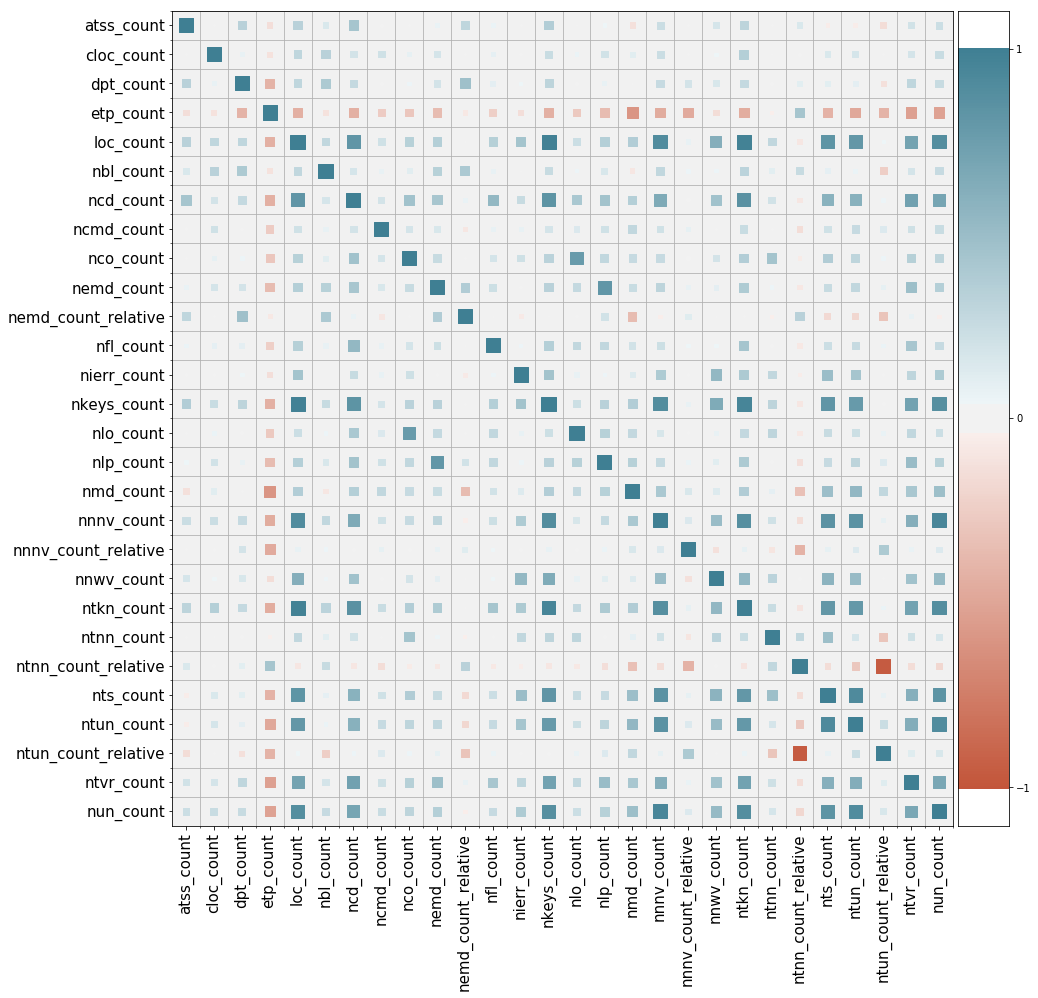

<Figure size 432x288 with 0 Axes>

In [25]:
columns = [index for index, row in data.corr().iterrows() if sum(abs(row))>6]
plt.figure(figsize=(15,15))
corrplot(data[columns].corr(), size_scale=200)

plt.figure()

In [30]:
cols = ['loc_count', 'ncd_count', 'nkeys_count', 'nnnv_count', 'ntkn_count', 'nun_count', 'nco_count',
               'nemd_count', 'ntun_count', 'ntnn_count_relative', 'nts_count', 'ntvr_count']
data.corr()[cols].loc[cols]

,loc_count,ncd_count,nkeys_count,nnnv_count,ntkn_count,nun_count,nco_count,nemd_count,ntun_count,ntnn_count_relative,nts_count,ntvr_count
loc_count,1.000000,0.825396,0.987053,0.901744,0.978003,0.889155,0.342852,0.363482,0.805295,-0.097906,0.827925,0.712998
ncd_count,0.825396,1.000000,0.835807,0.658903,0.855307,0.700856,0.458852,0.432984,0.603622,-0.095232,0.599283,0.727085
nkeys_count,0.987053,0.835807,1.000000,0.896899,0.958734,0.876344,0.331841,0.339936,0.787339,-0.093058,0.822601,0.718985
nnnv_count,0.901744,0.658903,0.896899,1.000000,0.881453,0.945219,0.266433,0.315332,0.844180,-0.150048,0.848199,0.621139
ntkn_count,0.978003,0.855307,0.958734,0.881453,1.000000,0.884092,0.366050,0.390717,0.799654,-0.113097,0.804749,0.722040
nun_count,0.889155,0.700856,0.876344,0.945219,0.884092,1.000000,0.316906,0.358067,0.902129,-0.189588,0.840335,0.682428
nco_count,0.342852,0.458852,0.331841,0.266433,0.366050,0.316906,1.000000,0.260833,0.302880,-0.063198,0.377180,0.356552
nemd_count,0.363482,0.432984,0.339936,0.315332,0.390717,0.358067,0.260833,1.000000,0.291280,-0.084079,0.256525,0.488174
ntun_count,0.805295,0.603622,0.787339,0.844180,0.799654,0.902129,0.302880,0.291280,1.000000,-0.279040,0.921280,0.627765
ntnn_count_relative,-0.097906,-0.095232,-0.093058,-0.150048,-0.113097,-0.189588,-0.063198,-0.084079,-0.279040,1.000000,-0.146517,-0.149750


Initially, we find high correlations between the following metrics:

- LOC: NCD, NKEYS, NNNV, NTKN, NUN, NTUN, NTS, NTVR
- NLO: NCO 
- NLP: NEMD

We divide the metrics into seven categories:
- General complexity:LOC, BLOC, CLOC NTKN, DPT, NKEYS, ETP,
- Tasks and modules:ATSS, NTS, NTVR, NMD, NFMD,
- External:NINC, NINCT, NINCV, NINCR, NIMPT, NIMPR, NEMD, NLK,NSH,
- Naming conventions:NUN, NNNV, NNWV, NTUN, NTNN,
- Errors and bad practices:NIERR, NDK, NBEH, NDM, NSCM,
- Other complexity:NBL, NCD, NCO, NICD, NLP, NFL, NLO, NCMD

We check the metrics for each category separately.

## General complexity metrics

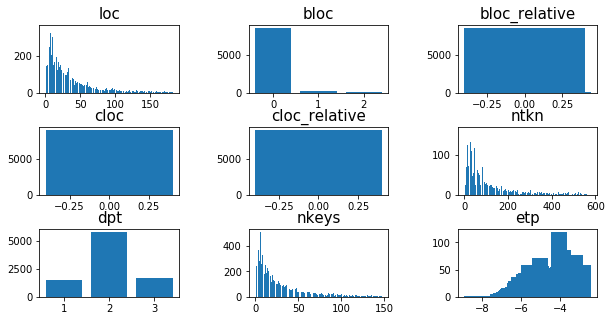

In [26]:


cols = ['loc_count', 'bloc_count', 'bloc_count_relative', 'cloc_count', 'cloc_count_relative',
       'ntkn_count', 'dpt_count', 'nkeys_count', 'etp_count']


fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(len(cols)):
    ax = fig.add_subplot(3,3,i+1)
    d = data[data[cols[i]] <= data[cols[i]].quantile(.95)][cols[i]]
    u, inv = np.unique(d, return_inverse=True)
    counts = np.bincount(inv)
    plt.bar(u, counts)
    ax.set_title(cols[i].replace("_count", ""), fontsize=15)
    
plt.savefig('figures/general_complexity_counts.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

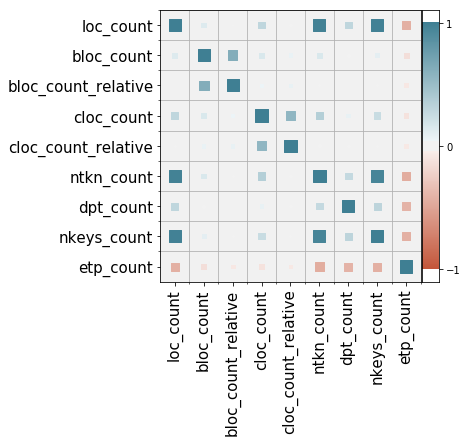

<Figure size 432x288 with 0 Axes>

In [27]:
columns = cols
plt.figure(figsize=(5,5))
corrplot(data[columns].corr(), size_scale=150)
plt.savefig('figures/general_complexity_corrplot.png', bbox_inches='tight')
plt.figure()

## Tasks and modules

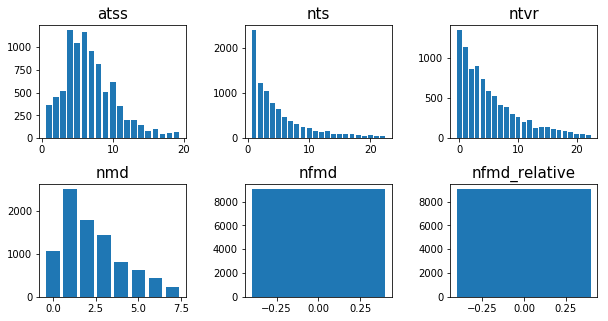

In [28]:
cols = ['atss_count', 'nts_count', 'ntvr_count', 'nmd_count', 
        'nfmd_count', 'nfmd_count_relative']


fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(cols)):
    ax = fig.add_subplot(2,3,i+1)
    d = data[data[cols[i]] <= data[cols[i]].quantile(.95)][cols[i]]
    u, inv = np.unique(d, return_inverse=True)
    counts = np.bincount(inv)
    plt.bar(u, counts)
    ax.set_title(cols[i].replace("_count", ""), fontsize=15)
    
plt.savefig('figures/tasks_modules_counts.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

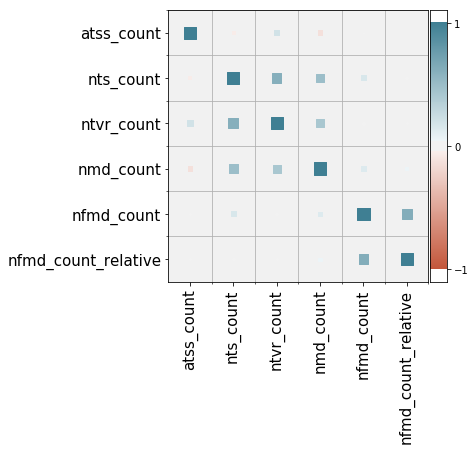

<Figure size 432x288 with 0 Axes>

In [29]:
columns = cols
plt.figure(figsize=(5,5))
corrplot(data[columns].corr(), size_scale=150)
plt.savefig('figures/tasks_modules_corrplot.png', bbox_inches='tight')
plt.figure()

## External metrics

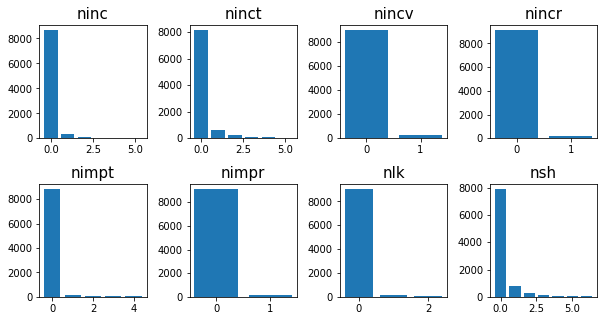

In [30]:
cols = ['ninc_count', 'ninct_count','nincv_count','nincr_count', 
        'nimpt_count', 'nimpr_count', 'nlk_count', 'nsh_count']


fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(cols)):
    ax = fig.add_subplot(2,4,i+1)
    d = data[data[cols[i]] <= data[cols[i]].quantile(.99)][cols[i]]
    #d = data[cols[i]]
    u, inv = np.unique(d, return_inverse=True)
    counts = np.bincount(inv)
    plt.bar(u, counts)
    ax.set_title(cols[i].replace("_count", ""), fontsize=15)
    
plt.savefig('figures/external_counts.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

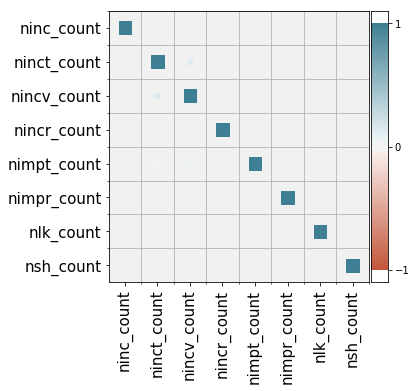

<Figure size 432x288 with 0 Axes>

In [31]:
columns = cols
plt.figure(figsize=(5,5))
corrplot(data[columns].corr(), size_scale=150)
plt.savefig('figures/external_corrplot.png', bbox_inches='tight')
plt.figure()

## Name giving

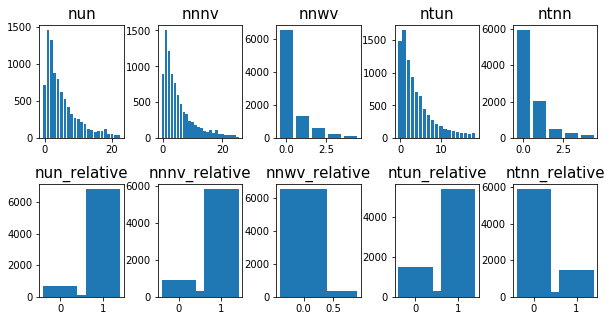

In [32]:
cols = ['nun_count',  'nnnv_count','nnwv_count', 'ntun_count', 'ntnn_count',
        'nun_count_relative', 'nnnv_count_relative', 'nnwv_count_relative',
        'ntun_count_relative', 'ntnn_count_relative']

fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(cols)):
    ax = fig.add_subplot(2,5,i+1)
    d = data[data[cols[i]] <= data[cols[i]].quantile(.95)][cols[i]]
    u, inv = np.unique(d, return_inverse=True)
    counts = np.bincount(inv)
    plt.bar(u, counts)
    ax.set_title(cols[i].replace("_count", ""), fontsize=15)
    
plt.savefig('figures/name_counts.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

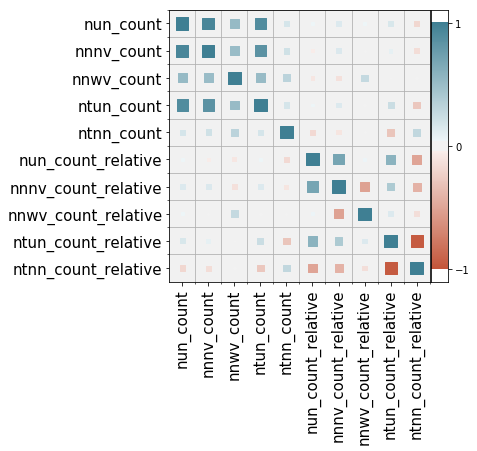

<Figure size 432x288 with 0 Axes>

In [33]:
columns = cols
plt.figure(figsize=(5,5))
corrplot(data[columns].corr(), size_scale=150)
plt.savefig('figures/name_corrplot.png', bbox_inches='tight')
plt.figure()

## Other complexity metrics

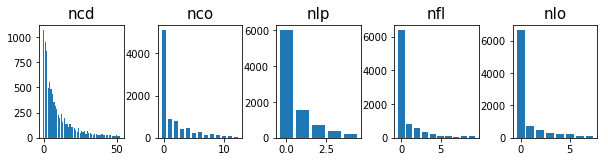

In [34]:
cols = ['ncd_count', 'nco_count', 'nlp_count', 'nfl_count', 'nlo_count']

fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(cols)):
    ax = fig.add_subplot(2,5,i+1)
    d = data[data[cols[i]] <= data[cols[i]].quantile(.95)][cols[i]]
    u, inv = np.unique(d, return_inverse=True)
    counts = np.bincount(inv)
    plt.bar(u, counts)
    ax.set_title(cols[i].replace("_count", ""), fontsize=15)
    
plt.savefig('figures/other_complexity_counts.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

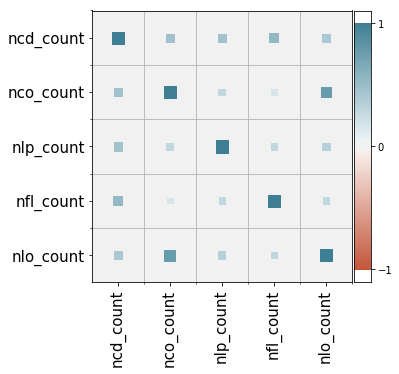

<Figure size 432x288 with 0 Axes>

In [35]:
columns = cols
plt.figure(figsize=(5,5))
corrplot(data[columns].corr(), size_scale=150)
plt.savefig('figures/other_complexity_corrplot.png', bbox_inches='tight')
plt.figure()

## Errors and bad practices

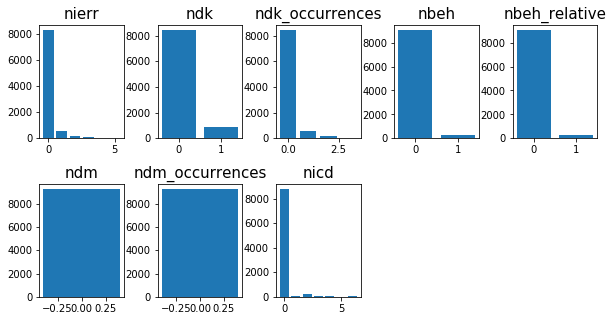

In [36]:
cols = ['nierr_count', 'ndk_count', 'ndk_count_occurrences', 'nbeh_count', 'nbeh_count_relative',
       'ndm_count',  'ndm_count_occurrences' , 'nicd_count']

fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(cols)):
    ax = fig.add_subplot(2,5,i+1)
    d = data[data[cols[i]] <= data[cols[i]].quantile(.99)][cols[i]]
    u, inv = np.unique(d, return_inverse=True)
    counts = np.bincount(inv)
    plt.bar(u, counts)
    ax.set_title(cols[i].replace("_count", ""), fontsize=15)
    
plt.savefig('figures/error_counts.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

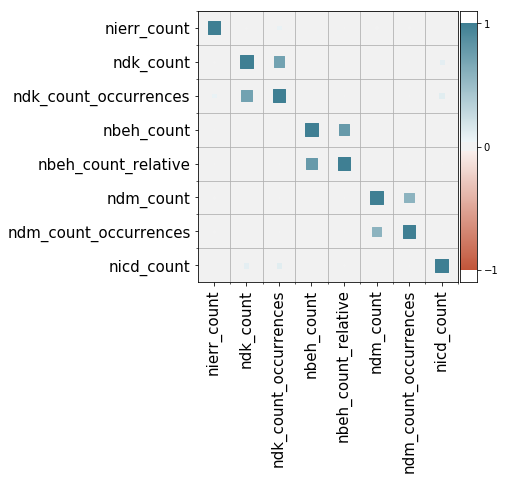

<Figure size 432x288 with 0 Axes>

In [37]:
columns = cols
plt.figure(figsize=(5,5))
corrplot(data[columns].corr(), size_scale=150)
plt.savefig('figures/error_corrplot.png', bbox_inches='tight')
plt.figure()